In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [11]:
# Set up the plot style and size
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)


In [12]:
# Read in the data and drop empty columns and columns we won't be using
data = pd.read_csv('AirQualityUCI_regression.csv')
data = data.drop(['delete', 'delete2', 'Date', 'Time'], axis=1)


In [13]:
# Check for missing data
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

         Null Count
Feature            
AH              114
RH              114
T               114
S5              114
S4              114
NO2             114
S3              114
NOx             114
S2              114
C6H6            114
NMHC            114
S1              114
CO              114


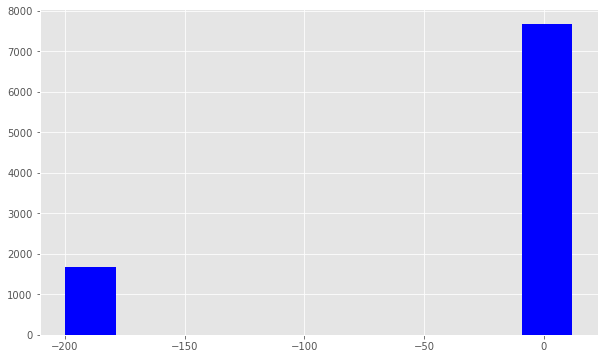

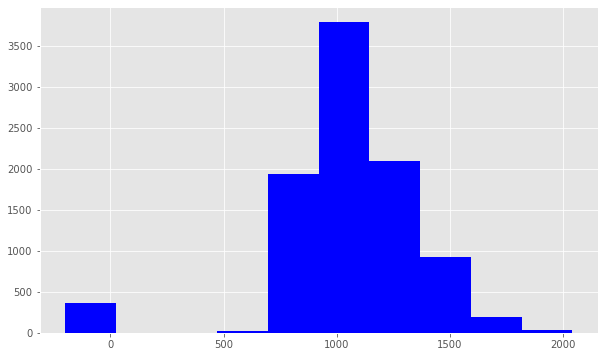

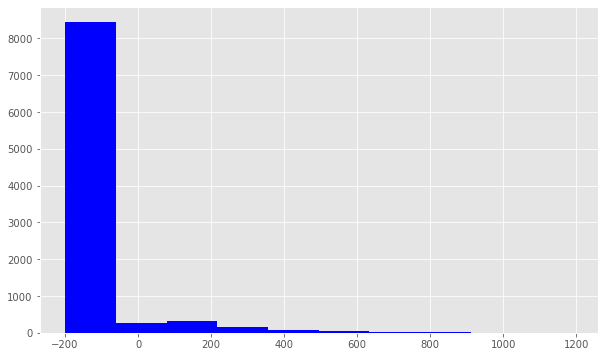

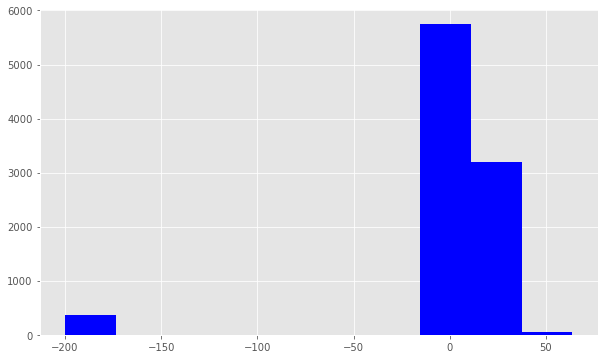

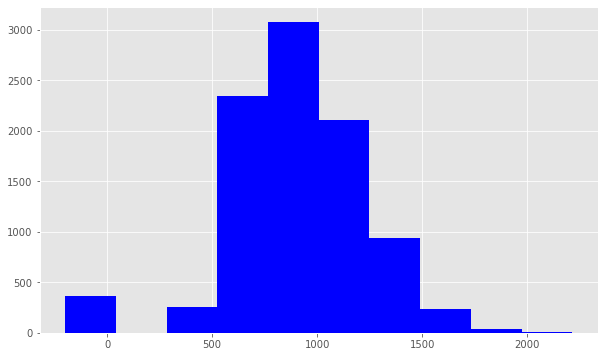

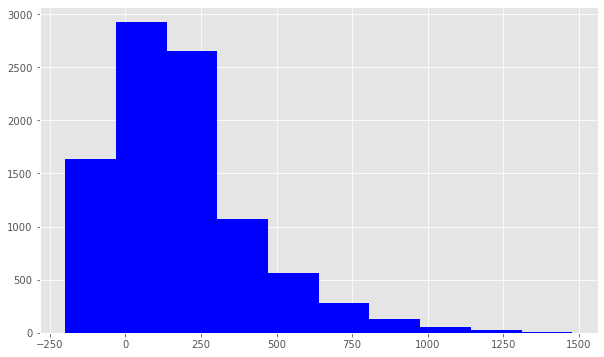

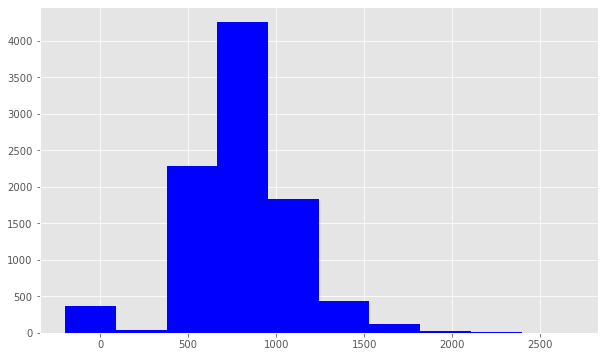

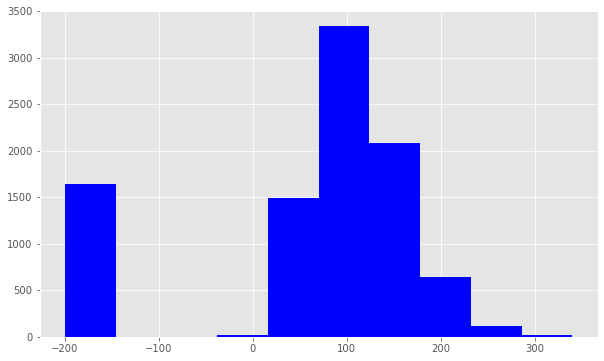

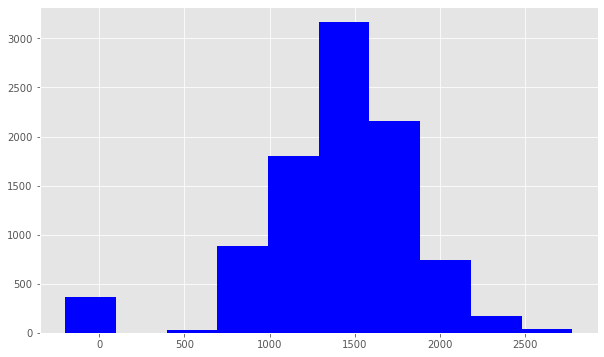

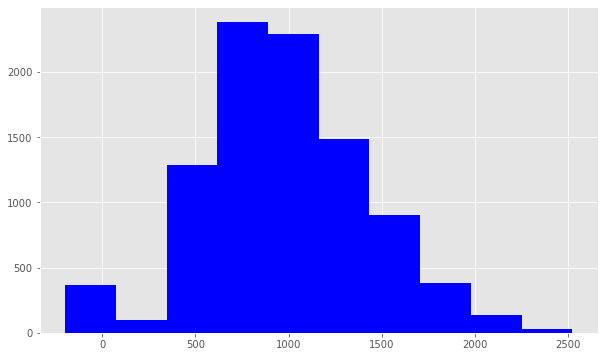

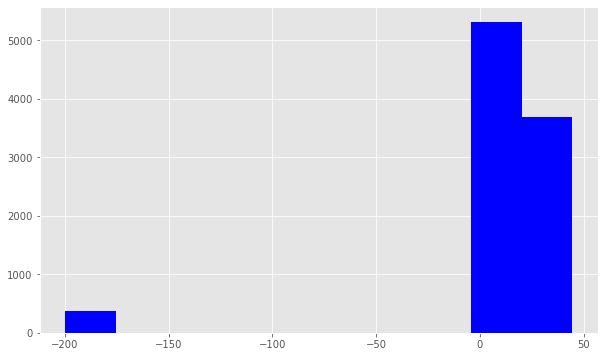

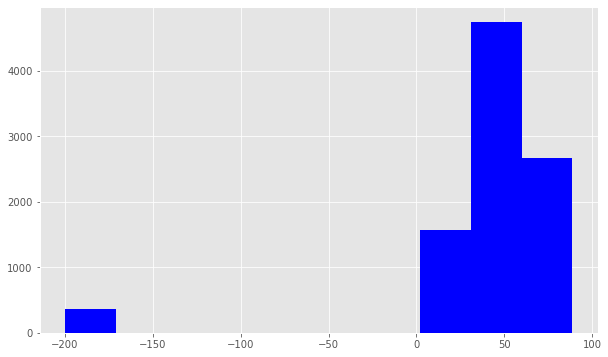

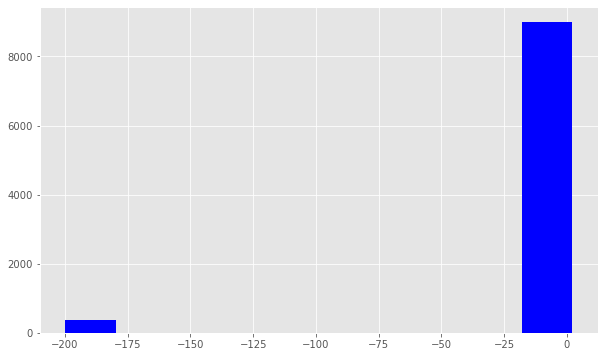

In [14]:
# Drop the missing rows
data = data.dropna()

# Split the data into test and training sets
train, test = train_test_split(data, test_size=0.33, random_state=42)

# Plot histograms to identify columns aproximating a normal distribution
for col in data.columns:
    plt.hist(data[col], color='blue')
    plt.show()


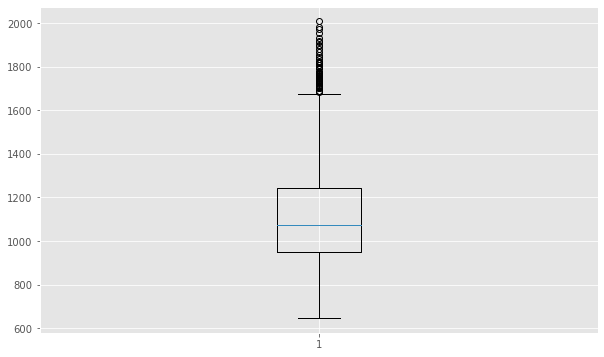

In [15]:
# This data set, evidently uses negative numbers to represent missing data
y = train.NOx[train.S1 > 0]
x = train.S1[train.S1 > 0]
x2 = train.S3[train.S1 > 0]

y = y[train.NOx > 0]
x = x[train.NOx > 0]
x2 = x2[train.NOx > 0]

# Set up the variables to remove outliers
x_avg = np.mean(x)
x_std = np.std(x)

# Box plot to check for outliers in one of the x-coordinates
plt.boxplot(x)
plt.show()


Skew is:  0.7165115084769457
Skew is:  0.3888873413151674


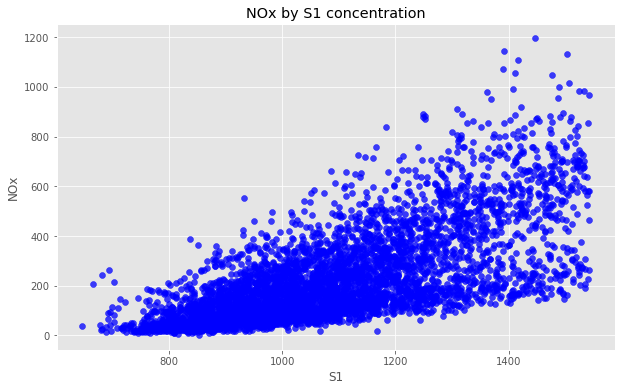

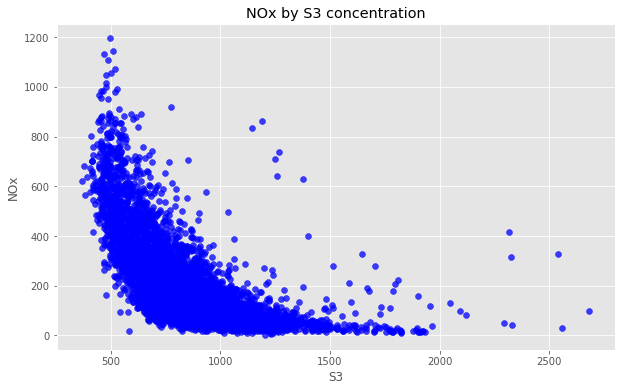

Skew is:  1.3629614837490542
Skew is:  0.25495119988359766


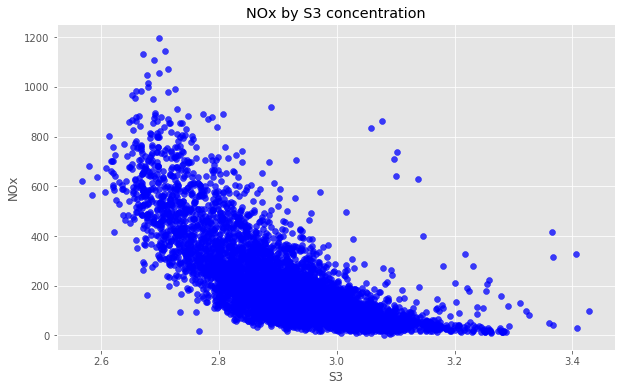

[ 2.82011236e-01 -7.10845852e+02]
R² with outliers:  -0.20404983649980601
R²:  0.5871944116925383
RMSE with outliers:  50740.46229962094
RMSE:  17396.24536761521


In [16]:
# Capture the regression before removing the outliers and transforming x2
x_temp = pd.concat([x, x2], axis=1)
clf_pre = linear_model.LinearRegression()
clf_pre.fit(x_temp, y)

print("Skew is: ", x.skew())

# Remove data points that are >= 2 standard deviations from the mean
y = y[x < 2*x_std + x_avg]
x2 = x2[x < 2*x_std + x_avg]
x = x[x < 2*x_std + x_avg]

print("Skew is: ", x.skew())

# Check linearity
plt.scatter(x, y, alpha=0.75, color='b')
plt.xlabel('S1')
plt.ylabel('NOx')
plt.title('NOx by S1 concentration')
plt.show()

plt.scatter(x2, y, alpha=0.75, color='b')
plt.xlabel('S3')
plt.ylabel('NOx')
plt.title('NOx by S3 concentration')
plt.show()

print("Skew is: ", x2.skew())
# Log10 transform the x2 coordinate to make it more linear
x2 = np.log10(x2)

print("Skew is: ", x2.skew())

# Check linearity visually
plt.scatter(x2, y, alpha=0.75, color='b')
plt.xlabel('S3')
plt.ylabel('NOx')
plt.title('NOx by S3 concentration')
plt.show()

# Capture the regression
x = pd.concat([x, x2], axis=1)
clf = linear_model.LinearRegression()
clf.fit(x, y)

# Set up the test data in the same manner as the training data
x_test = pd.concat([test.S1, test.S3], axis=1)
y_test = test['NOx']

y_test = y_test[x_test.S1 > 0]
x_test = x_test[x_test.S1 > 0]

y_test = y_test[x_test.S3 > 0]
x_test = x_test[x_test.S3 > 0]

x_test = x_test[y_test > 0]
y_test = y_test[y_test > 0]

x_test = pd.concat([x_test.S1, np.log10(x_test.S3)], axis=1)

# Predict the y-values with the test x data
predictions = clf.predict(x_test)
predictions2 = clf_pre.predict(x_test)

# Display the coefficients and the model score
print(clf.coef_)
print("R² with outliers: ", clf_pre.score(x_test, y_test))
print("R²: ", clf.score(x_test, y_test))
print("RMSE with outliers: ", mean_squared_error(y_test, predictions2))
print("RMSE: ", mean_squared_error(y_test, predictions))

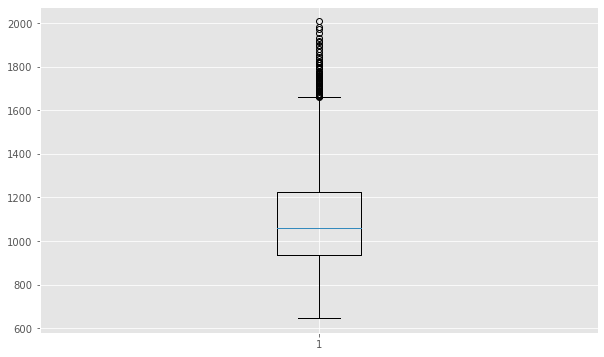

In [18]:
# This data set, evidently uses negative numbers to represent missing data
y = train.AH[train.S1 > 0]
x = train.S1[train.S1 > 0]
x2 = train.S3[train.S1 > 0]

y = y[train.AH > 0]
x = x[train.AH > 0]
x2 = x2[train.AH > 0]

# Set up the variables to remove outliers
x_avg = np.mean(x)
x_std = np.std(x)

# Box plot to check for outliers in one of the x-coordinates
plt.boxplot(x)
plt.show()

Skew is:  0.7469923548071232
Skew is:  0.4281686689136423


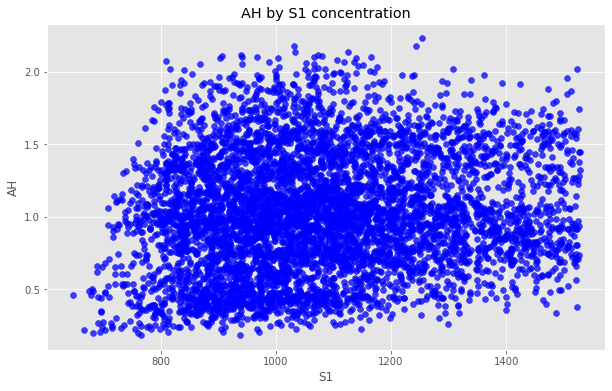

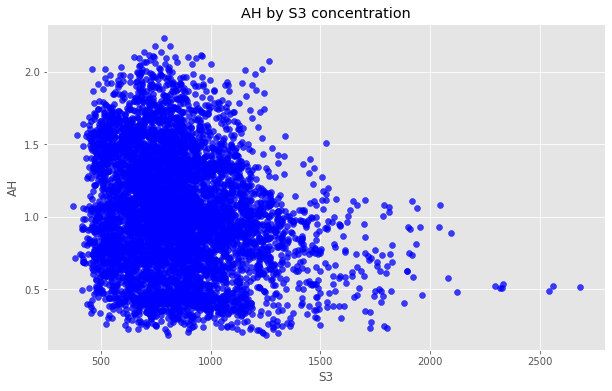

Skew is:  1.263667128681495
Skew is:  0.19562057045686138


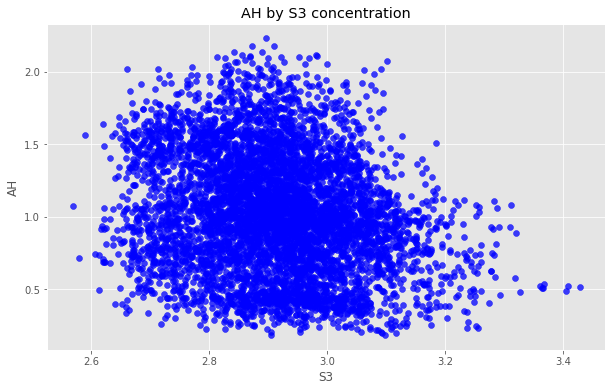

[-3.05953490e-04 -1.09154037e+00]
R² with outliers:  -1.0356051503609844
R²:  0.0675315387364317
RMSE with outliers:  0.33003149671278315
RMSE:  0.1511805773598615


In [19]:
# Capture the regression before removing the outliers and transforming x2
x_temp = pd.concat([x, x2], axis=1)
clf_pre = linear_model.LinearRegression()
clf_pre.fit(x_temp, y)

print("Skew is: ", x.skew())

# Remove data points that are >= 2 standard deviations from the mean
y = y[x < 2*x_std + x_avg]
x2 = x2[x < 2*x_std + x_avg]
x = x[x < 2*x_std + x_avg]

print("Skew is: ", x.skew())

# Check linearity
plt.scatter(x, y, alpha=0.75, color='b')
plt.xlabel('S1')
plt.ylabel('AH')
plt.title('AH by S1 concentration')
plt.show()

plt.scatter(x2, y, alpha=0.75, color='b')
plt.xlabel('S3')
plt.ylabel('AH')
plt.title('AH by S3 concentration')
plt.show()

print("Skew is: ", x2.skew())
# Log10 transform the x2 coordinate to make it more linear
x2 = np.log10(x2)

print("Skew is: ", x2.skew())

# Check linearity visually
plt.scatter(x2, y, alpha=0.75, color='b')
plt.xlabel('S3')
plt.ylabel('AH')
plt.title('AH by S3 concentration')
plt.show()

# Capture the regression
x = pd.concat([x, x2], axis=1)
clf = linear_model.LinearRegression()
clf.fit(x, y)

# Set up the test data in the same manner as the training data
x_test = pd.concat([test.S1, test.S3], axis=1)
y_test = test['AH']

y_test = y_test[x_test.S1 > 0]
x_test = x_test[x_test.S1 > 0]

y_test = y_test[x_test.S3 > 0]
x_test = x_test[x_test.S3 > 0]

x_test = x_test[y_test > 0]
y_test = y_test[y_test > 0]

x_test = pd.concat([x_test.S1, np.log10(x_test.S3)], axis=1)

# Predict the y-values with the test x data
predictions = clf.predict(x_test)
predictions2 = clf_pre.predict(x_test)

# Display the coefficients and the model score
print(clf.coef_)
print("R² with outliers: ", clf_pre.score(x_test, y_test))
print("R²: ", clf.score(x_test, y_test))
print("RMSE with outliers: ", mean_squared_error(y_test, predictions2))
print("RMSE: ", mean_squared_error(y_test, predictions))